##### unit8  인구 구조를 다양한 형태로 시각화하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

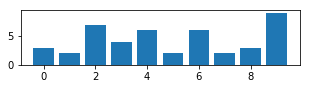

In [8]:
#막대그래프 (X, Y)
plt.figure(figsize=(5,1))
plt.bar(np.arange(10), np.random.randint(1,10,size=10))

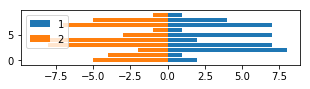

In [12]:
plt.figure(figsize=(5,1))
plt.barh(np.arange(10), np.random.randint(1,10,size=10),label='1')#bar horizontal
plt.barh(np.arange(10), - np.random.randint(1,10,size=10),label='2')#bar horizontal
plt.legend()

In [144]:
#p115
df = pd.read_csv('Chuncheon.csv', encoding='cp949')
df = df.replace(',', '', regex=True) 
df.shape

(3842, 207)

- 특정 도시(춘천)의 여성과 남성의 나이별 인구수 대조
- 컬럼 위치 찾기 : 남 0세~ 남90세, 여 0세 ~ 여90세
- 0세:10명 1세:20명.... 도시에서 모두 누적 > 막대 그래프로 표현

In [145]:
'a' in 'abc', 'x' in 'abc'

(True, False)

In [146]:
max_age = 99
city = '울산광역시 중구 학성동'
man_0 = '2019년05월_남_0세'
woman_0 = '2019년05월_여_0세'
columns = list(df.columns)
man_0_index = columns.index(man_0)
woman_0_index = columns.index(woman_0)
columns[man_0_index], columns[man_0_index + max_age]
columns[woman_0_index],columns[woman_0_index + max_age]

('2019년05월_여_0세', '2019년05월_여_99세')

In [147]:
data = np.array(df)
area = data[:, 0]
city_row_index = -1
for i in range(len(area)):
    if city in area[i]:
        print(i, area[i])
        city_row_index = i

1179 울산광역시 중구 학성동(3111051000)


In [148]:
city_data = data[city_row_index] # 특정 도시 데이터
city_man = city_data[man_0_index:man_0_index + max_age].astype(np.int)
city_woman = city_data[woman_0_index:woman_0_index + max_age].astype(np.int)
city_man.shape, city_woman.shape

((99,), (99,))

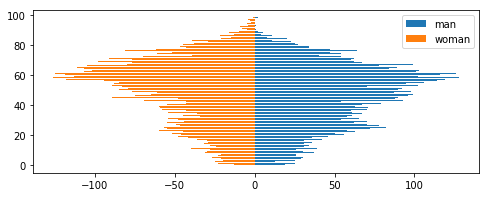

In [149]:
plt.figure(figsize=(8,3))
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()

In [190]:
city = '춘천' # 이 글자가 들어간 행은 전부 찾자, 조건부 검색, 마스크(True만 뽑기)
is_contain = []
for i in range(len(area)):
    is_contain.append(city in area[i])

np.mean(is_contain)
city_data = data[is_contain]
city_data.shape

(26, 207)

In [191]:
city_man = city_data[:, man_0_index:man_0_index+max_age].astype(np.int)
city_woman = city_data[:, woman_0_index:woman_0_index+max_age].astype(np.int)
city_man.shape, city_woman.shape
city_man = np.sum(city_man, axis=0)
city_woman = np.sum(city_woman, axis=0)

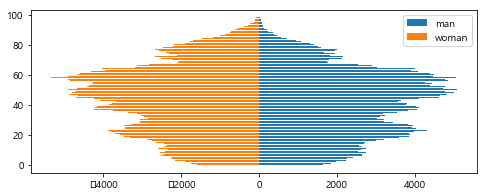

In [192]:
plt.figure(figsize=(8,3))
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()

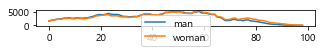

In [213]:
plt.figure(figsize=(5,0.3))
p = plt.plot(city_man, label='man')
p = plt.plot(city_woman, label='woman')
p = plt.legend()

<BarContainer object of 99 artists>

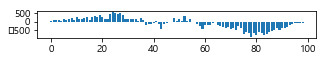

In [217]:
#p144 남녀 인구의 차이 
plt.figure(figsize=(5,0.5))
plt.bar(np.arange(len(city_man)), city_man - city_woman)

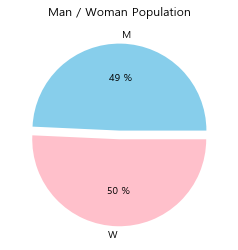

In [203]:
plt.title('Man / Woman Population')
colors = ['skyblue', 'pink']
n = plt.pie([np.sum(city_man),np.sum(city_woman)]
            , labels=['M', 'W'],autopct='%d %%',colors=colors, explode=(0, 0.1))

In [153]:
city_man = np.sum(city_man, axis=0)
city_woman = np.sum(city_woman, axis=0)

In [26]:
df.columns

Index(['행정구역', '2019년05월_남_총인구수', '2019년05월_남_연령구간인구수', '2019년05월_남_0세',
       '2019년05월_남_1세', '2019년05월_남_2세', '2019년05월_남_3세', '2019년05월_남_4세',
       '2019년05월_남_5세', '2019년05월_남_6세',
       ...
       '2019년05월_여_91세', '2019년05월_여_92세', '2019년05월_여_93세', '2019년05월_여_94세',
       '2019년05월_여_95세', '2019년05월_여_96세', '2019년05월_여_97세', '2019년05월_여_98세',
       '2019년05월_여_99세', '2019년05월_여_100세 이상'],
      dtype='object', length=207)

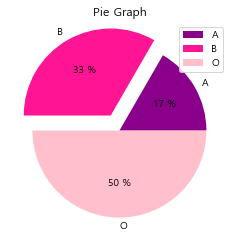

In [186]:
#p130, p134 파이 돌출 효과
plt.rc('font', family='Malgun Gothic')
color = ['darkmagenta', 'deeppink', 'pink']
plt.title("Pie Graph")
n = plt.pie([10,20,30], labels=['A', 'B', 'O'], autopct='%.0f %%'
            , colors=color, explode=(0, 0.2, 0))
n = plt.legend()